In [1]:
import json
import os
import pandas as pd
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cwd = os.getcwd()

rel_path = "sample_graphs/sourcecred_sourcecred.json"
abs_file_path = os.path.abspath(os.path.join(cwd, '..', rel_path))

with open(abs_file_path) as json_file:  
    data = json.load(json_file)

In [3]:
type(data)

list

In [4]:
len(data)

2

In [5]:
data[0]

{'type': 'sourcecred/graph', 'version': '0.4.0'}

In [6]:
data[1].keys()

dict_keys(['nodes', 'edges'])

In [7]:
data[1]['nodes'][:5]

[['sourcecred', 'git', 'COMMIT', '007cf88172d7ea9b0cdada78f124f7a41b811b30'],
 ['sourcecred', 'git', 'COMMIT', '00bc9a94616d867c9e66ef77bfb239e578d3569e'],
 ['sourcecred', 'git', 'COMMIT', '00da630bb29708fc34cce66069812d3c5a63ba79'],
 ['sourcecred', 'git', 'COMMIT', '00e2a674778ad43eede379b6666b84b2205ce2ee'],
 ['sourcecred', 'git', 'COMMIT', '01071866be710d194689e16b3654a0edb2fc46b3']]

In [8]:
ndf= pd.DataFrame(data[1]['nodes'])

In [9]:
ndf.shape

(5932, 9)

In [10]:
ndf.head()

,0,1,2,3,4,5,6,7,8
0,sourcecred,git,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,None,None,None,None,None
1,sourcecred,git,COMMIT,00bc9a94616d867c9e66ef77bfb239e578d3569e,None,None,None,None,None
2,sourcecred,git,COMMIT,00da630bb29708fc34cce66069812d3c5a63ba79,None,None,None,None,None
3,sourcecred,git,COMMIT,00e2a674778ad43eede379b6666b84b2205ce2ee,None,None,None,None,None
4,sourcecred,git,COMMIT,01071866be710d194689e16b3654a0edb2fc46b3,None,None,None,None,None


In [11]:
for c in ndf.columns:
    print(c)
    result = ndf[c].unique()
    if len(result)>10:
        print(result[:10])
    else:
        print(result)
        
    print("")

0
['sourcecred']

1
['git' 'github']

2
['COMMIT' 'COMMENT' 'ISSUE' 'PULL' 'REPO' 'REVIEW' 'USERLIKE']

3
['007cf88172d7ea9b0cdada78f124f7a41b811b30'
 '00bc9a94616d867c9e66ef77bfb239e578d3569e'
 '00da630bb29708fc34cce66069812d3c5a63ba79'
 '00e2a674778ad43eede379b6666b84b2205ce2ee'
 '01071866be710d194689e16b3654a0edb2fc46b3'
 '011e9a755befa499a1e2e254379f5b261bc5305c'
 '0128df8c1871db9f3e09719b8bfff31b862d5083'
 '0149d74971dae0f791b0b8761641f88333a79f61'
 '01510ca63f511335b4125bb5d1f414bcc3a9687d'
 '01634aabcca3756b38e13aaf2f451cfbda2ad5ea']

4
[None 'sourcecred' '000drax' 'AChildAtPlay' 'BrianLitwin' 'DeepAndy'
 'Dim25' 'Recmo' 'ajbouh' 'anthrocypher']

5
[None 'sourcecred' '1004' '1011' '1019' '1020' '1021' '1022' '1023' '1027']

6
[None '1004' '1019' '1020' '1021' '1023' '1027' '1028' '103' '1033']

7
[None '437639471' '437713677' '437715066' '438340491' '439641568'
 '439726352' '440105645' '441301857' '441308649']

8
[None '165852057' '175968709' '234392807' '234392898' '234392952'


In [12]:
data[1]['edges'][:5]

[{'srcIndex': 0,
  'dstIndex': 736,
  'address': ['sourcecred',
   'git',
   'HAS_PARENT',
   '2',
   'COMMIT',
   '007cf88172d7ea9b0cdada78f124f7a41b811b30',
   '2',
   'COMMIT',
   'd310561b9473ecaa0e22da3dac089ab61df2f723']},
 {'srcIndex': 1,
  'dstIndex': 844,
  'address': ['sourcecred',
   'git',
   'HAS_PARENT',
   '2',
   'COMMIT',
   '00bc9a94616d867c9e66ef77bfb239e578d3569e',
   '2',
   'COMMIT',
   'f100cd02ccabdab93a502f777fdce268b88a0db5']},
 {'srcIndex': 2,
  'dstIndex': 322,
  'address': ['sourcecred',
   'git',
   'HAS_PARENT',
   '2',
   'COMMIT',
   '00da630bb29708fc34cce66069812d3c5a63ba79',
   '2',
   'COMMIT',
   '59ac10b6126ac2d4c9912e93b13e6b4d8edfa986']},
 {'srcIndex': 3,
  'dstIndex': 134,
  'address': ['sourcecred',
   'git',
   'HAS_PARENT',
   '2',
   'COMMIT',
   '00e2a674778ad43eede379b6666b84b2205ce2ee',
   '2',
   'COMMIT',
   '233bec4f5e80a8deee915c91cc86f2c1c1ff328e']},
 {'srcIndex': 4,
  'dstIndex': 184,
  'address': ['sourcecred',
   'git',
   'HAS_PA

In [13]:
edge_data = data[1]['edges']

In [14]:
edge_data[0].keys()

dict_keys(['srcIndex', 'dstIndex', 'address'])

In [15]:
edge_data[0]['srcIndex']

0

In [16]:
edge_data[0]['address']

['sourcecred',
 'git',
 'HAS_PARENT',
 '2',
 'COMMIT',
 '007cf88172d7ea9b0cdada78f124f7a41b811b30',
 '2',
 'COMMIT',
 'd310561b9473ecaa0e22da3dac089ab61df2f723']

In [17]:
edf = pd.DataFrame([ [edge_data[r]['srcIndex'],edge_data[r]['dstIndex'] ] + edge_data[0]['address']
                    for r in range(len(edge_data))])

In [18]:
edf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,736,sourcecred,git,HAS_PARENT,2,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,2,COMMIT,d310561b9473ecaa0e22da3dac089ab61df2f723
1,1,844,sourcecred,git,HAS_PARENT,2,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,2,COMMIT,d310561b9473ecaa0e22da3dac089ab61df2f723
2,2,322,sourcecred,git,HAS_PARENT,2,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,2,COMMIT,d310561b9473ecaa0e22da3dac089ab61df2f723
3,3,134,sourcecred,git,HAS_PARENT,2,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,2,COMMIT,d310561b9473ecaa0e22da3dac089ab61df2f723
4,4,184,sourcecred,git,HAS_PARENT,2,COMMIT,007cf88172d7ea9b0cdada78f124f7a41b811b30,2,COMMIT,d310561b9473ecaa0e22da3dac089ab61df2f723


In [19]:
for c in edf.columns:
    print(c)
    result = edf[c].unique()
    if len(result)>10:
        print(result[:10])
    else:
        print(result)
        
    print("")

0
[0 1 2 3 4 5 6 7 8 9]

1
[736 844 322 134 184 133 627 788 734 789]

2
['sourcecred']

3
['git']

4
['HAS_PARENT']

5
['2']

6
['COMMIT']

7
['007cf88172d7ea9b0cdada78f124f7a41b811b30']

8
['2']

9
['COMMIT']

10
['d310561b9473ecaa0e22da3dac089ab61df2f723']



In [20]:
G = nx.Graph()

for r in range(len(edge_data)):
    G.add_edge(edge_data[r]['srcIndex'], edge_data[r]['dstIndex'])

I think it would make sense to try to structure the data in one of these formats. What you have alread isn't that far from the first one in the link below.

https://networkx.github.io/documentation/stable/reference/readwrite/json_graph.html

the fact is we'll probably want to be doing both graph generators and graph analysis with networkX 

https://networkx.github.io/documentation/stable/_downloads/networkx_reference.pdf

so it would make it a lot smoother to move between reality and R&D if the data formats matched.

In [21]:
h = nx.degree_histogram(G)

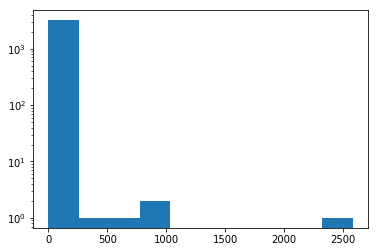

In [22]:
plt.hist(h)
plt.yscale('log')

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


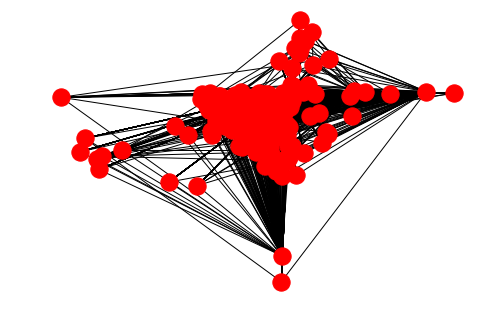

In [23]:
#drawing here is pretty lame without more attention to layout but you solve for you own positions
#this is a hybrid of random and circular because the simple algs were trivially useless
#and the complex algorithms couldn't compute in reasonable time

deg = nx.degree(G)
N = len(G.nodes)
r1 = 1
t1 = 10
r2 = 400
t2 = 20
r3 = 1000

def get_pos(r, n, rv=True):
    if rv:
        rvx = np.random.rand()
        rvy = np.random.rand()
    else:
        rvx = 1
        rvy = 1
    
    return np.array([r*rvx*np.cos(2*np.pi*n/N) , r*rvy*np.sin(2*np.pi*n/N) ])

pos = {}
for n in G.nodes:
    if deg[n]<t1:
        pos[n] = get_pos(r1, n)
    elif deg[n]<t2:
        pos[n] = get_pos(r2, n)
    else :
        pos[n] = get_pos(r3, n)

nx.draw(G, pos)

Nothing particularly interesting until we get the Graph objects "G" correctly labeled with all the meta data so we can use the more fun features of networkX.